In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
% matplotlib inline

# The above command sets the backend of matplotlib to the 'inline' backend. 
# It means the output of plotting commands is displayed inline.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dm = pd.read_csv('/content/drive/MyDrive/project_datasets/SALES.txt', sep='\n', header= None)
dn = pd.read_csv('/content/drive/MyDrive/project_datasets/ADVER.txt', sep='\n', header= None)

In [5]:
df = pd.concat([dm, dn.reindex(dm.index)],axis=1)

In [6]:
# Exploratory data analysis

# View the dimensions of df

print(dm.shape)
print(dn.shape)
print(df.shape)

(36, 1)
(36, 1)
(36, 2)


In [7]:
# View the top 5 rows of df

print(df.head())

      0     0
0  12.0  15.0
1  20.5  16.0
2  21.0  18.0
3  15.5  27.0
4  15.3  21.0


In [8]:
# Rename columns of df dataframe

df.columns = ['Sales', 'Advertising']

In [9]:
# View the top 5 rows of df with column names renamed

print(df.head())

   Sales  Advertising
0   12.0         15.0
1   20.5         16.0
2   21.0         18.0
3   15.5         27.0
4   15.3         21.0


In [10]:
# View dataframe summary

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        36 non-null     float64
 1   Advertising  36 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes
None


In [11]:
# View descriptive statistics

print(df.describe())

           Sales  Advertising
count  36.000000    36.000000
mean   24.255556    28.527778
std     6.185118    18.777625
min    12.000000     1.000000
25%    20.300000    15.750000
50%    24.250000    23.000000
75%    28.600000    41.000000
max    36.500000    65.000000


In [12]:
# Declare feature variable and target variable

X = df['Sales'].values
y = df['Advertising'].values

# Sales and Advertising data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

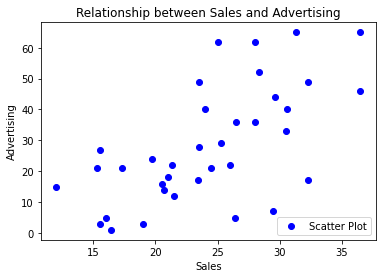

In [13]:
# Plot scatter plot between X and y

plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

In [14]:
# Print the dimensions of X and y

print(X.shape)
print(y.shape)

(36,)
(36,)


In [15]:
# Reshape X and y

X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [16]:
# Print the dimensions of X and y after reshaping

print(X.shape)
print(y.shape)

(36, 1)
(36, 1)


In [17]:
# Split X and y into training and test data sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
# Print the dimensions of X_train,X_test,y_train,y_test

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(12, 1)
(12, 1)


In [19]:
# Fit the linear model

# Instantiate the linear regression object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred=lm.predict(X_test)

In [20]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_,
print("Estimated model slope, a:" , a)
print("Estimated model intercept, b:" , b)

Estimated model slope, a: [[1.60509347]]
Estimated model intercept, b: (array([-11.16003616]),)


In [21]:
# Predicting Advertising values

lm.predict(X)[0:5]

# Predicting Advertising values on first five Sales values.

array([[ 8.10108551],
       [21.74438002],
       [22.54692675],
       [13.71891266],
       [13.39789396]])

In [22]:
# Calculate and print Root Mean Square Error(RMSE)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value: {:.4f}".format(rmse))

RMSE value: 11.2273


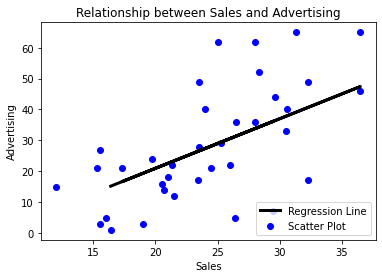

In [23]:
# Plot the Regression Line


plt.scatter(X, y, color = 'blue', label='Scatter Plot')
plt.plot(X_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

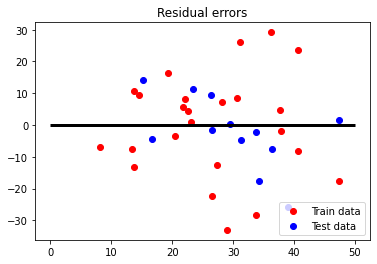

In [24]:
# Plotting residual errors

plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [25]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(lm.score(X_train,y_train)))

print("Test set score: {:.4f}".format(lm.score(X_test,y_test)))

Training set score: 0.2861
Test set score: 0.5789


In [26]:
# Save model for future use

from sklearn.externals import joblib
joblib.dump(lm, 'lm_regressor.pkl')

# To load the model

# lm2=joblib.load('lm_regressor.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['lm_regressor.pkl']

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Data science

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

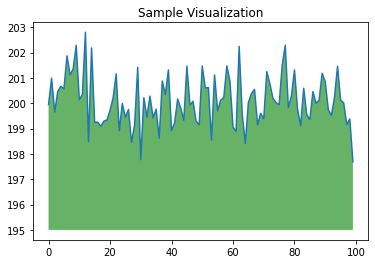

In [27]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

## Machine learning

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

## More Resources

### Working with Notebooks in Colab
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [TensorFlow 2 in Colab](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### Working with Data
- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb) 
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

### Machine Learning Crash Course
These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb)
- [Tensorflow concepts](/notebooks/mlcc/tensorflow_programming_concepts.ipynb)

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

## Machine Learning Examples

To see end-to-end examples of the interactive machine learning analyses that Colaboratory makes possible, check out these  tutorials using models from [TensorFlow Hub](https://tfhub.dev).

A few featured examples:

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.
